[[-1  0]
 [ 1  0]
 [ 1 -1]]
[[-1  0]
 [-1  0]
 [ 1  1]]


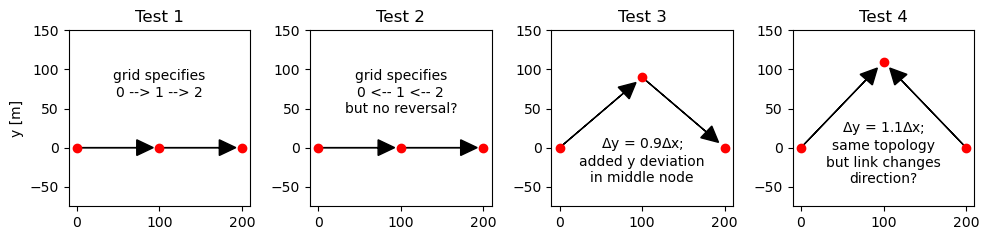

In [6]:
from landlab import NetworkModelGrid
import matplotlib.pyplot as plt

#grid size
dx = 100.

#specify node locations and link connections
x_of_node = (0.,dx,dx*2.0)
y_of_node = (0.,0.,0.)
nodes_at_link = ((0,1),(1,2)) # 0 -> 1 -> 2
grid = NetworkModelGrid((y_of_node, x_of_node), nodes_at_link)

#specify node locations and link connections but switched the tails and heads
x_of_node = (0.,dx,dx*2.0)
y_of_node = (0.,0.,0.)
nodes_at_link = ((1,0),(2,1)) # 0 <- 1 <- 2
grid1 = NetworkModelGrid((y_of_node, x_of_node), nodes_at_link)

#respecify node locations and link connections with middle node at x = dx * 0.9
x_of_node = (0.,dx,dx*2.0)
y_of_node = (0.,dx*0.9,0.)
nodes_at_link = ((0,1),(1,2)) # 0 -> 1 -> 2
grid2 = NetworkModelGrid((y_of_node, x_of_node), nodes_at_link)
print (grid2.link_dirs_at_node)

#respecify node locations and link connections with middle node at x = dx * 1.1
x_of_node = (0.,dx,dx*2.0)
y_of_node = (0.,dx*1.1,0.)
nodes_at_link = ((0,1),(1,2)) # 0 -> 1 -> 2
grid3 = NetworkModelGrid((y_of_node, x_of_node), nodes_at_link)
print (grid3.link_dirs_at_node)

#plotting function
def plot_network(ax,grid,title):
    for i in range(0,grid.number_of_links): #loop through links
        tail = grid.node_at_link_tail[i] #index for tail node
        dx_arrow = grid.unit_vector_at_link[i][0] * grid.length_of_link[i] #y distance of arrow
        dy_arrow = grid.unit_vector_at_link[i][1] * grid.length_of_link[i] #x distance of arrow
        
        #draw arrow
        truncate_arrow = 0.925 #make arrow length shorter for better visability
        ax.arrow(grid.x_of_node[tail],grid.y_of_node[tail],dx_arrow*truncate_arrow ,dy_arrow*truncate_arrow ,\
                 length_includes_head = True, head_width=dx/5.0, head_length=dx/5.0,\
                 color='k')
        
        #set axis limites
        ax.set_ylim(-dx*0.75,dx*1.5)
        ax.set_xlim(-10,210)
        ax.set_title(title)
        
    #plot the nodes
    ax.scatter(grid.x_of_node,grid.y_of_node,color='r')
    
fig, axs = plt.subplots(1, 4, figsize=(10, 2.5))
plot_network(axs[0],grid,'Test 1')
axs[0].text(100,100,'grid specifies\n0 --> 1 --> 2',ha='center',va='top')
plot_network(axs[1],grid1,'Test 2')
axs[1].text(100,100,'grid specifies\n0 <-- 1 <-- 2\nbut no reversal?',ha='center',va='top')
plot_network(axs[2],grid2,'Test 3')
axs[2].text(100,15,r'$\Delta$y = 0.9$\Delta$x;'+'\nadded y deviation\nin middle node',ha='center',va='top')
plot_network(axs[3],grid3,'Test 4')
axs[3].text(100,35,r'$\Delta$y = 1.1$\Delta$x;'+'\nsame topology\nbut link changes\ndirection?',ha='center',va='top')
axs[0].set_ylabel('y [m]')
plt.tight_layout()
plt.savefig('network_tests.png',dpi=200)

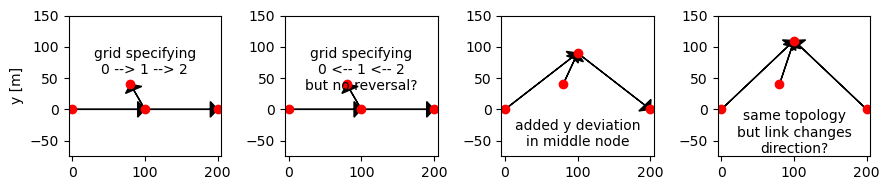

In [2]:
from landlab import NetworkModelGrid
import matplotlib.pyplot as plt

#Link goes from Tail to Head
#Node 0 is the outlet
#Node 1 is the midpoint
#Node 2 is the channel head
#Direction -1 is ingoing flux, and 1 is outgoing

#grid size
dx = 100.
dz = 50.

#specify node locations and link connections
x_of_node = (0.,dx,dx*2.0,dx*0.8)
y_of_node = (0.,0.,0.,40.)
nodes_at_link = ((0,1),(1,2),(3,1)) # 0 -> 1 -> 2
grid = NetworkModelGrid((y_of_node, x_of_node), nodes_at_link)

#specify node locations and link connections
x_of_node = (0.,dx,dx*2.0,dx*0.8)
y_of_node = (0.,0.,0.,40.)
nodes_at_link = ((1,0),(2,1),(1,3)) # 0 <- 1 <- 2
grid1 = NetworkModelGrid((y_of_node, x_of_node), nodes_at_link)

# #respecify node locations and link connections with middle node at x = dx * 0.9
x_of_node = (0.,dx,dx*2.0,dx*0.8)
y_of_node = (0.,dx*0.9,0.,40.)
nodes_at_link = ((0,1),(1,2),(3,1)) # 0 -> 1 -> 2
grid2 = NetworkModelGrid((y_of_node, x_of_node), nodes_at_link)

#respecify node locations and link connections with middle node at x = dx
x_of_node = (0.,dx,dx*2.0,dx*0.8)
y_of_node = (0.,dx*1.1,0.,40.)
nodes_at_link = ((0,1),(1,2),(3,1)) # 0 -> 1 -> 2
grid3 = NetworkModelGrid((y_of_node, x_of_node), nodes_at_link)

#specify node locations and link connections
x_of_node = (0.,dx*0.8,dx,dx*2.0)
y_of_node = (0.,40.,0.,0.)
nodes_at_link = ((2,0),(2,1),(3,2)) # 0 -> 1 -> 2
gridgah = NetworkModelGrid((y_of_node, x_of_node), nodes_at_link)

def plot_network(ax,grid):
    for i in range(0,grid.number_of_links): #loop through links
        tail = grid.node_at_link_tail[i] #index for tail node
        dx_arrow = grid.unit_vector_at_link[i][0] * grid.length_of_link[i] #y distance of arrow
        dy_arrow = grid.unit_vector_at_link[i][1] * grid.length_of_link[i] #x distance of arrow
        
        #draw arrow
        ax.arrow(grid.x_of_node[tail],grid.y_of_node[tail],dx_arrow,dy_arrow,\
                 length_includes_head = True, head_width=dx/4.0, head_length=dx/10.,\
                 color='k')
        
        #set axis limites
        ax.set_ylim(-dx*0.75,dx*1.5)
        ax.set_xlim(-5,205)
        
    #plot the nodes
    ax.scatter(grid.x_of_node,grid.y_of_node,color='r')
    
fig, axs = plt.subplots(1, 4, figsize=(9, 2))
plot_network(axs[0],grid)
axs[0].text(100,100,'grid specifying\n0 --> 1 --> 2',ha='center',va='top')
plot_network(axs[1],gridgah)
axs[1].text(100,100,'grid specifying\n0 <-- 1 <-- 2\nbut no reversal?',ha='center',va='top')
plot_network(axs[2],grid2)
axs[2].text(100,-15,'added y deviation\nin middle node',ha='center',va='top')
plot_network(axs[3],grid3)
axs[3].text(100,0,'same topology\nbut link changes\ndirection?',ha='center',va='top')
axs[0].set_ylabel('y [m]')
plt.tight_layout()